In [128]:
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [131]:
tf.random.set_seed(2)

In [132]:
new_image = cv2.imread("data/RAW/train/bear/0001.png")
print(new_image.shape)

(32, 32, 3)


In [133]:
TRAIN_BASE_DIRECTORY = "./data/test/train"
TEST_BASE_DIRECTORY = "./data/test/test"


image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0)


TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 64

In [134]:
train_generator = image_data_generator.flow_from_directory(
    TRAIN_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

validation_generator = image_data_generator.flow_from_directory(
    TEST_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [167]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model.add(Conv2D(64, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 32770     
Total params: 86,466
Trainable params: 86,466
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator, shuffle=False)

Epoch 1/10
16/16 [==============================] - 3s 193ms/step - loss: 31.3607 - accuracy: 0.5420 - val_loss: 0.5713 - val_accuracy: 0.7000
Epoch 2/10
16/16 [==============================] - 3s 184ms/step - loss: 0.5261 - accuracy: 0.7500 - val_loss: 0.3993 - val_accuracy: 0.8400
Epoch 3/10
16/16 [==============================] - 3s 181ms/step - loss: 0.3952 - accuracy: 0.8290 - val_loss: 0.3336 - val_accuracy: 0.8500
Epoch 4/10
16/16 [==============================] - 3s 182ms/step - loss: 0.3136 - accuracy: 0.8790 - val_loss: 0.3529 - val_accuracy: 0.8450
Epoch 5/10
16/16 [==============================] - 3s 175ms/step - loss: 0.2824 - accuracy: 0.8850 - val_loss: 0.2747 - val_accuracy: 0.8700
Epoch 6/10
16/16 [==============================] - 3s 175ms/step - loss: 0.2128 - accuracy: 0.9200 - val_loss: 0.2751 - val_accuracy: 0.8800
Epoch 7/10
16/16 [==============================] - 3s 181ms/step - loss: 0.1787 - accuracy: 0.9360 - val_loss: 0.3136 - val_accuracy: 0.8800
Epoch

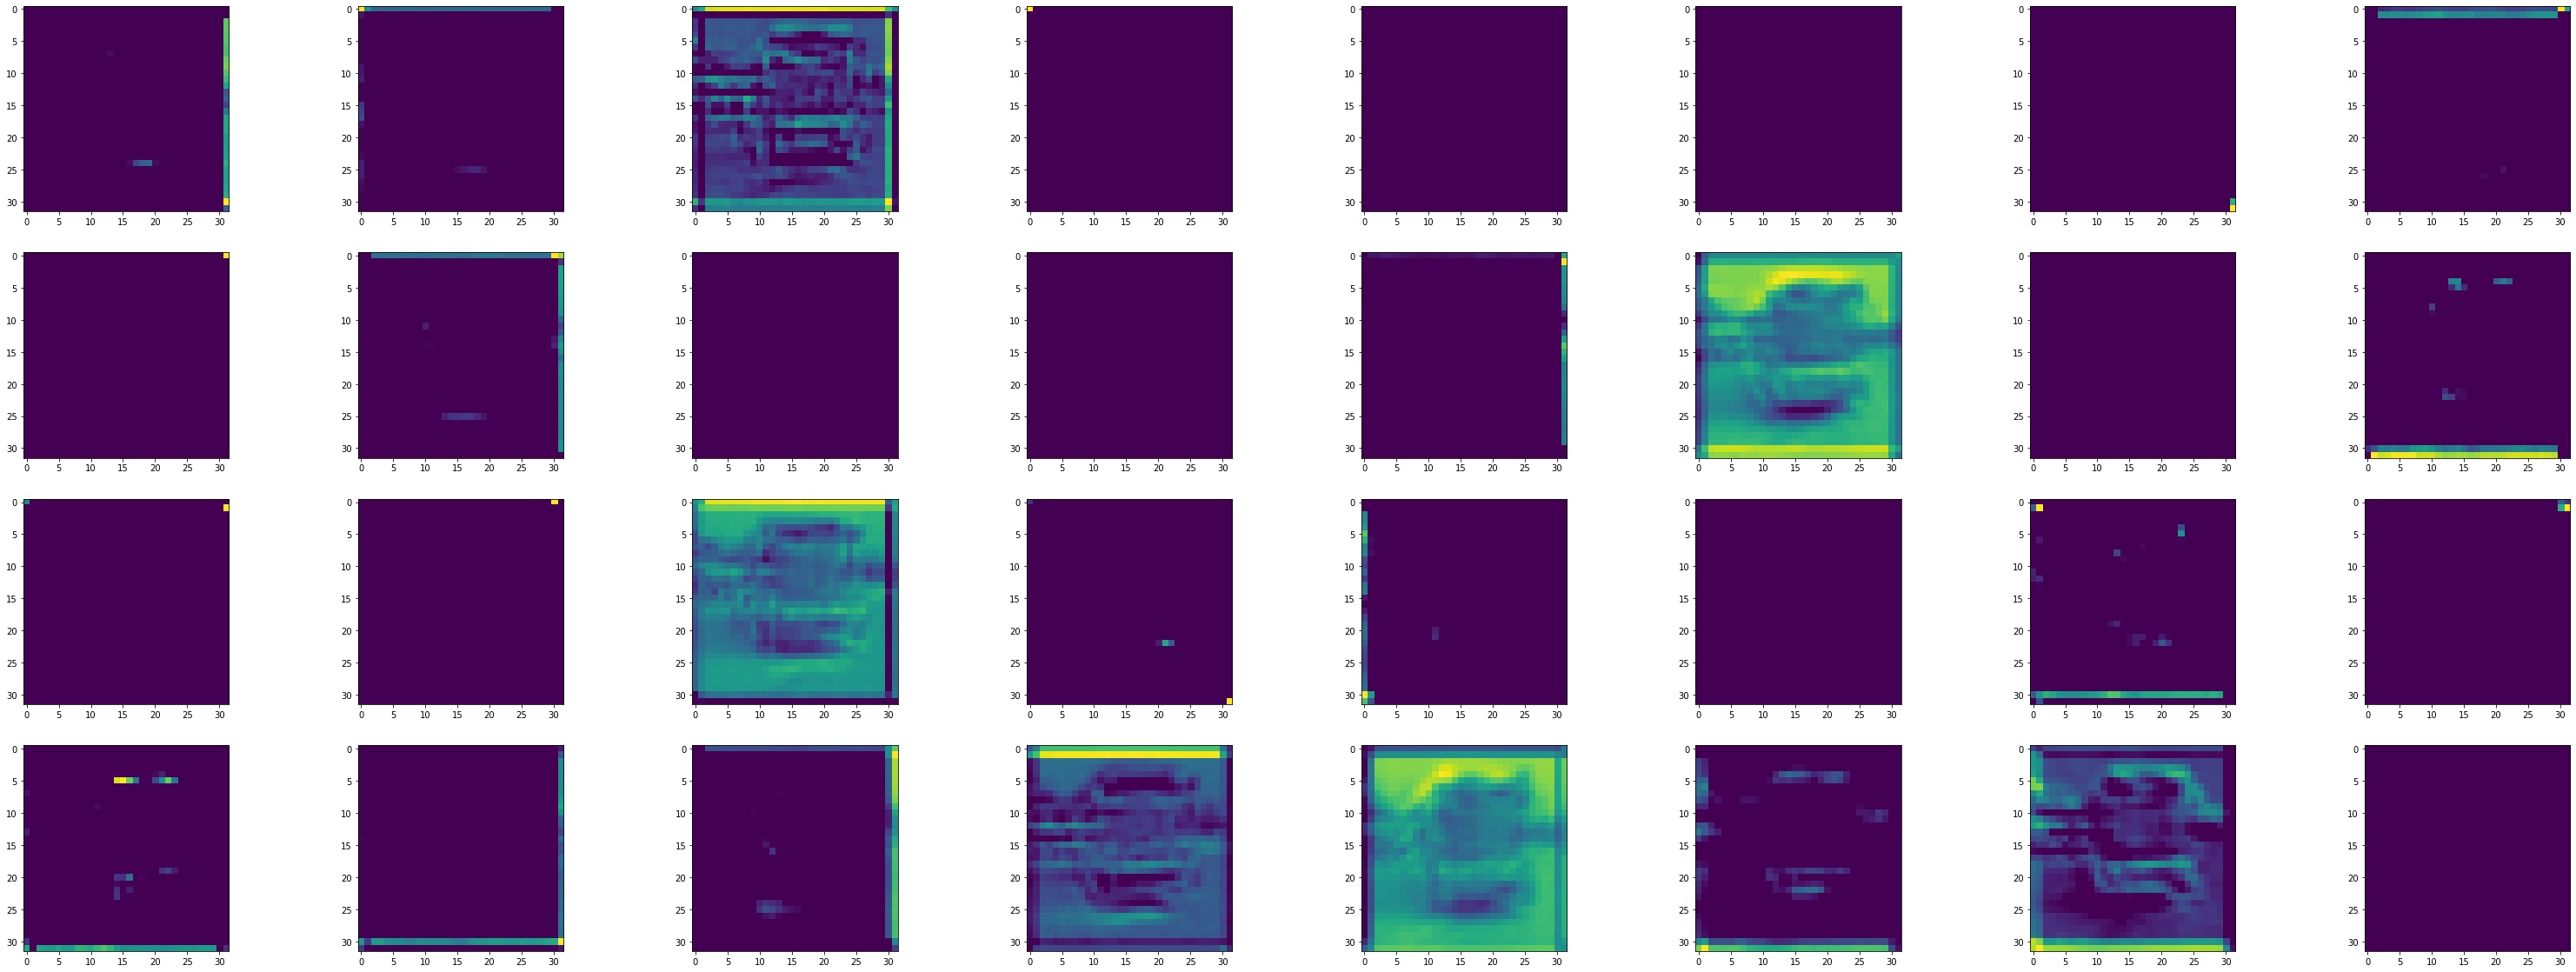

In [170]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np

layer_outputs = [layer.output for layer in model.layers]

test_image = "./data/test/test/bus/0020.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

display_activation(activations, 8, 4, 0)